In [72]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
from scipy.stats import gaussian_kde

sns.set_style("whitegrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
train_df = pd.read_csv('/Users/yuda/PycharmProjects/my_isic2024/isic-2024-challenge/train-metadata.csv')
test_df  = pd.read_csv('/Users/yuda/PycharmProjects/my_isic2024/isic-2024-challenge/test-metadata.csv', low_memory=False)
target_df = train_df[train_df['target'] == 1]

/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_4750/1386987203.py:12: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/Users/yuda/PycharmProjects/my_isic2024/isic-2024-challenge/train-metadata.csv')


In [2]:
train_df = train_df[['isic_id', 'patient_id', 'target', 'sex', 'age_approx', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext',  'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',  'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_radial_color_std_max', 'tbp_lv_color_std_mean', 'tbp_lv_stdL', 'tbp_lv_stdLExt',  'clin_size_long_diam_mm', 'tbp_lv_minorAxisMM', 'tbp_lv_perimeterMM', 'tbp_lv_area_perim_ratio', 'tbp_lv_areaMM2', 'tbp_lv_eccentricity', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'anatom_site_general', 'tbp_lv_location', 'tbp_lv_location_simple', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'tbp_tile_type',  'tbp_lv_nevi_confidence', 'attribution', 'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence']]

In [3]:
train_df['tbp_lv_x'] = train_df['tbp_lv_x'].round(0)
train_df['tbp_lv_y'] = train_df['tbp_lv_y'].round(0)
train_df['tbp_lv_z'] = train_df['tbp_lv_z'].round(0)

In [4]:
patients = train_df['patient_id'].unique()
array_patients_df = [train_df[train_df['patient_id'] == patient] for patient in patients]

In [5]:
array_patients_target_df = [target_df[train_df['patient_id'] == patient] for patient in patients]

/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_4750/1523959281.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  array_patients_target_df = [target_df[train_df['patient_id'] == patient] for patient in patients]
/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_4750/1523959281.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  array_patients_target_df = [target_df[train_df['patient_id'] == patient] for patient in patients]
/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_4750/1523959281.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  array_patients_target_df = [target_df[train_df['patient_id'] == patient] for patient in patients]
/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_4750/1523959281.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  array_patients_target_df = [target_df[train_df['patient_id'] == patien

In [6]:
for df in array_patients_df:
    df['xyz'] = df.apply(lambda row: [row['tbp_lv_x'], row['tbp_lv_y'], row['tbp_lv_z']], axis=1) 

/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_4750/2374380661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xyz'] = df.apply(lambda row: [row['tbp_lv_x'], row['tbp_lv_y'], row['tbp_lv_z']], axis=1)
/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_4750/2374380661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xyz'] = df.apply(lambda row: [row['tbp_lv_x'], row['tbp_lv_y'], row['tbp_lv_z']], axis=1)
/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_4750/237438

## you can see the cancer ones as red. change the range for mor pictures

patient id: IP_8170065
patient id: 67519    IP_8170065
Name: patient_id, dtype: object
number of cancer lesions:  1


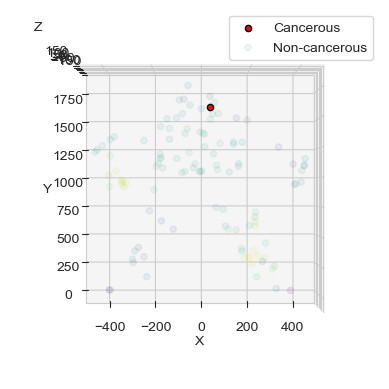

patient id: IP_6724798
patient id: 63455    IP_6724798
Name: patient_id, dtype: object
number of cancer lesions:  1


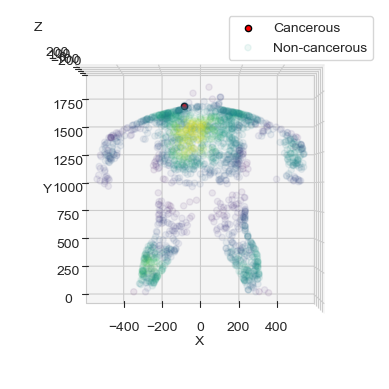

patient id: IP_4111386
patient id: Series([], Name: patient_id, dtype: object)
number of cancer lesions:  0


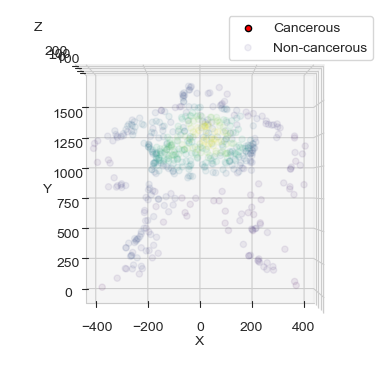

patient id: IP_8313778
patient id: 292387    IP_8313778
388710    IP_8313778
Name: patient_id, dtype: object
number of cancer lesions:  2


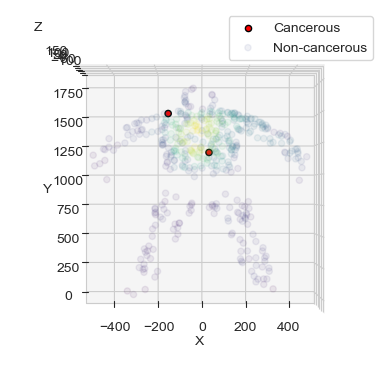

In [75]:


# Define your range
start_ra = 1
end_ra = 5

for df, target_df in zip(array_patients_df[start_ra:end_ra], array_patients_target_df[start_ra:end_ra]):
    print(f"patient id: {df['patient_id'].iloc[0]}")
    print(f"patient id: {target_df['patient_id']}")
    print('number of cancer lesions: ', len(target_df))

    # Calculate the density for non-cancerous data points
    xyz = np.vstack([df['tbp_lv_x'], df['tbp_lv_y'], df['tbp_lv_z']])
    kde = gaussian_kde(xyz)(xyz)
    
    # Normalize density for colormap
    norm_density = (kde - kde.min()) / (kde.max() - kde.min())
    colormap = cm.viridis(norm_density)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cancerous data points in red
    ax.scatter(target_df['tbp_lv_x'], target_df['tbp_lv_y'], target_df['tbp_lv_z'], c='r', marker='o', alpha=1, label='Cancerous',
               edgecolors='black')
    
    # Plot non-cancerous data points with density colormap
    ax.scatter(df['tbp_lv_x'], df['tbp_lv_y'], df['tbp_lv_z'], c=colormap, marker='o', alpha=0.08, label='Non-cancerous')
    
    ax.set_xlabel('X')  # from hand to hand
    ax.set_ylabel('Y')  # from leg to head
    ax.set_zlabel('Z')  # from back to front
    ax.view_init(elev=90, azim=(90*3))  # elev horizontal, azim vertical (if the man is upside down, use azim)
    
    plt.legend()
    plt.show()